# Getting the Data

First step is to download the data from the website and save it in a folder. For this, we will need to use 3 modules.
1. os Module
This module will help to check whether folder is there or not, to make directories and other os related functions
2. tarfile
In Ubunto, zip file is called as Tar file. The dataset which will the downloaded is of tar file. Thus we will use this module to work with the the tar file.
3. urllib
Urllib will help us to download the data from the url

In [29]:
#Creating url path and download path

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

import os
import tarfile
from six.moves import urllib


def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH) :
    if not os.path.isdir(housing_path) :
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

We have sucessfully fetch the data from the required url. Now we need to load that csv file in pandas DataFrame

In [30]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH) :
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()

We have created a function that will take the csv file path from the given locaton and then return a DataFrame of the path. Thus Housing now will be a pandas DataFrame. Let us look at the data now

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In total, we have 10 attributes. Here the label is Housing Median Value and thus we will have total 9 input features. Of these 9, we have 8 quantitative and 1 qualitative.

In [32]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Now let us check the data

In [33]:
# Using head method
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


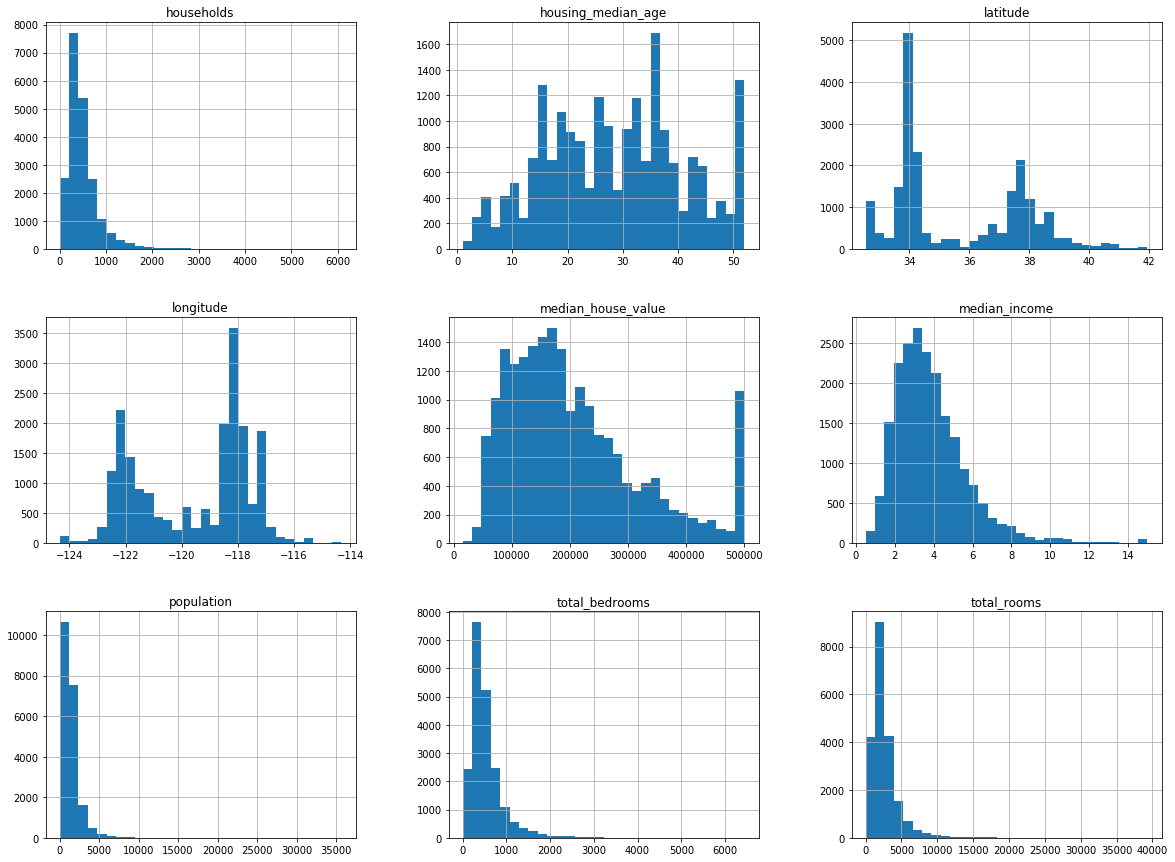

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 30, figsize = (20,15))
plt.show()

Before any further analysis on the data, we would like to split the data into Training Set and Test Set. We will use Stratified Split to ensure that the data is equally split on basis of Income Category in training and test set

In [37]:
#First let us generate a column that can be used for Stratified Split
import numpy as np

housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

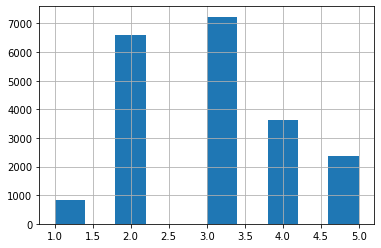

In [38]:
housing['income_cat'].hist()

In [39]:
#Once the classifying column has been created, we can Sckit library to split the data

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [40]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [41]:
for set_ in (strat_train_set, strat_test_set) :
    set_.drop('income_cat', axis = 1, inplace = True)

# Data Visualization and Insights

Now we have successfully created the training and test set. We can now move to data visualization and gain insights from the data

In [42]:
housing = strat_train_set.copy()

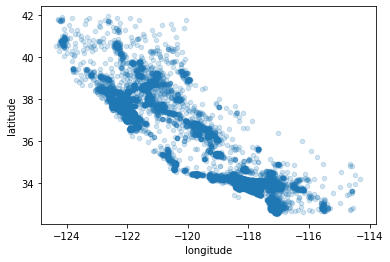

In [43]:
housing.plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = 0.2)

In [44]:
# Try to generate a more informative graph

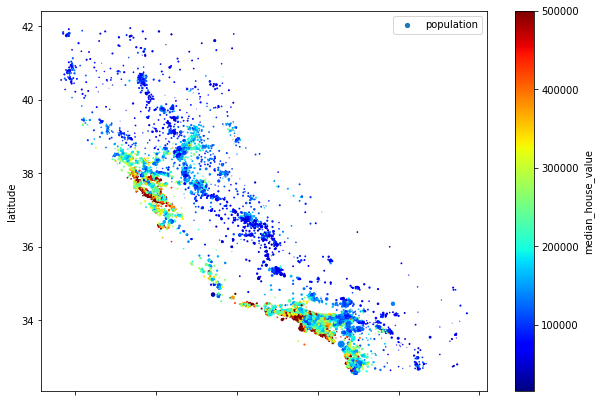

In [45]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
            s = housing['population']/ 1000, label = 'population',
            figsize = (10,7), c = 'median_house_value',
            cmap = plt.get_cmap('jet'), colorbar = True,)

plt.legend()

Now let us try to look for Insights in the data

In [46]:
correlation_matrix = housing.corr()

In [47]:
correlation_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

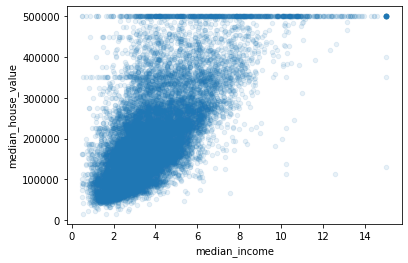

In [48]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

In [49]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_label = strat_train_set['median_house_value'].copy()

In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [51]:
housing_label.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

Prepare the Data for Machine Learning Algorithm

We have visualize the data and gained few insights of the data. Now we are required to prepare the data for the algorithm. There will be 3 types of processes we will be applying on the data.

1. Data Cleaning
  - The data which is missing needs to be either removed or filled with some suitable values.
  
2. Handling Text and Categorical Attributes
  - ML Algorithm cannot work with text data. This needs to get converted into numerical inputs
  
3. Adding Additional Attributes
  - Additional Attributes to be added by creating a class
  
  
All these process must have fit & transform method.
Finally, we will create a Pipeline to execute all the funtions together

In [52]:
# Data Filling with median

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = 'median') #creating instance of imputer

from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelBinarizer

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    
encoder = MyLabelBinarizer()

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    
    def __init__(self, add_bedrooms_per_room = True) :
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y= None) :
        return self #nothing else to do
    
    def transform(self, X, y = None) :
        rooms_per_hhold = X[:, rooms_ix]/ X[:, household_ix]
        population_per_hhold = X[:, population_ix]/ X[:, household_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, household_ix]
            return np.c_[X, rooms_per_hhold, population_per_hhold, bedrooms_per_room]
        
        else :
            return np.c_[X, rooms_per_hhold, population_per_hhold]
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)


from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

class DataFrameSelector(BaseEstimator, TransformerMixin) :
    
    def __init__(self, attribute_names) :
        self.attribute_names = attribute_names
        
    def fit(self, X, y= None) :
        return self
    
    def transform(self, X) :
        return X[self.attribute_names].values
    

/home/vinay/env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


We have prepared all the required Transformation. Now let us create a pipeline 

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

housing_num = housing.drop('ocean_proximity', axis = 1)

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list= [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)


/home/vinay/env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [54]:
housing_prepared.shape

(16512, 16)

# Train the Data

We will be using Random Forest to train the data

In [58]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

/home/vinay/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
housing_predictions = forest_reg.predict(housing_prepared)

In [62]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(housing_label, housing_predictions)

rmse = np.sqrt(mse)
rmse

22518.616521194657

# Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, housing_prepared, housing_label,
                        scoring = 'neg_mean_squared_error', cv= 10)

tree_rmse = np.sqrt(-scores)

In [69]:
def display_scores(scores) :
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

In [70]:
display_scores(tree_rmse)

Scores:  [51038.28090917 50457.29063312 52629.25246801 55175.66404764
 52948.81575921 57049.2192302  52351.86784086 51804.63427867
 56082.29886923 52769.38479406]
Mean:  53230.670883016406
Standard Deviation:  2060.439524235467


# Fine Tune the Model

Once cross validation is done, we are required to fine tune our model. This involve tuning of Hyper Parameters.

In [71]:
#Fine Tune using Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [3,10,30], 'max_features' : [2,4,6,8]},
         {'bootstrap' : [False], 'n_estimators' : [3,10], 
         'max_features' : [2,3,4]}, ]

grid_search = GridSearchCV(forest_reg, param_grid, cv= 5,
                          scoring = 'neg_mean_squared_error')\

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [73]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [74]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score), params)

64672.88412284573 {'max_features': 2, 'n_estimators': 3}
55813.307634637116 {'max_features': 2, 'n_estimators': 10}
53099.56573172165 {'max_features': 2, 'n_estimators': 30}
60272.97848644529 {'max_features': 4, 'n_estimators': 3}
52725.7810495531 {'max_features': 4, 'n_estimators': 10}
50474.29037774403 {'max_features': 4, 'n_estimators': 30}
58167.0539327534 {'max_features': 6, 'n_estimators': 3}
51709.1499677383 {'max_features': 6, 'n_estimators': 10}
49559.669920104454 {'max_features': 6, 'n_estimators': 30}
59530.483656065575 {'max_features': 8, 'n_estimators': 3}
51900.42897712633 {'max_features': 8, 'n_estimators': 10}
49822.83245230794 {'max_features': 8, 'n_estimators': 30}
61924.26134872598 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55203.05159818202 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58925.374134113605 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52457.673563091914 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [75]:
#Ensemble Method

feature_importance = grid_search.best_estimator_.feature_importances_

# Collecting Attributes Name

extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_hhold']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importance, attributes), reverse= True)

AttributeError: 'MyLabelBinarizer' object has no attribute 'classes_'

# Evaluate on Test Set

In [76]:
final_model = grid_search.best_estimator_

In [77]:
x_test = strat_test_set.drop('median_house_value', axis =1)
y_test = strat_test_set['median_house_value'].copy()

x_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

final_rmse

47728.572695241404

Completed